
### Dataset Overview ###
         id                               name  year_published  min_players  \
0  174430.0                         Gloomhaven          2017.0            1   
1  161936.0          Pandemic Legacy: Season 1          2015.0            2   
2  224517.0                  Brass: Birmingham          2018.0            2   
3  167791.0                  Terraforming Mars          2016.0            1   
4  233078.0  Twilight Imperium: Fourth Edition          2017.0            3   

   max_players  play_time  min_age  users_rated  rating_average  bgg_rank  \
0            4        120       14        42055            8.79         1   
1            4         60       13        41643            8.61         2   
2            4        120       14        19217            8.66         3   
3            5        120       12        64864            8.43         4   
4            6        480       14        13468            8.70         5   

   complexity_average  owned_users  

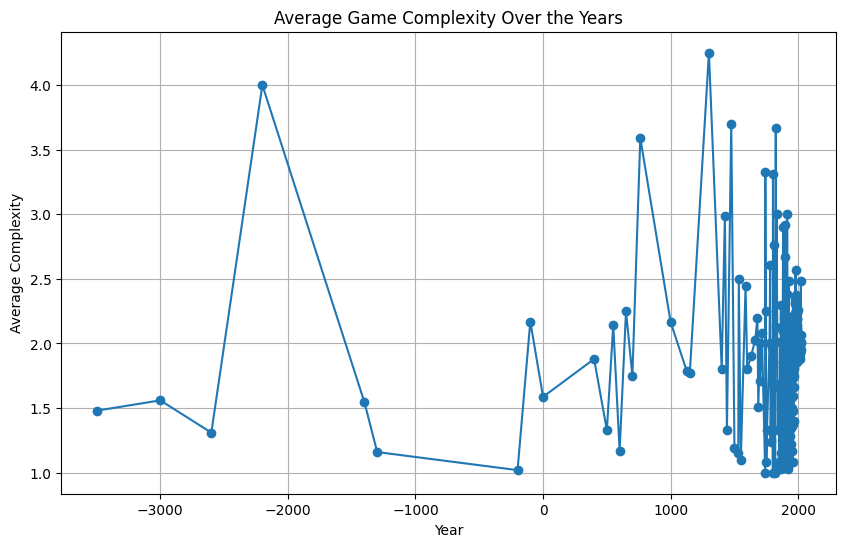

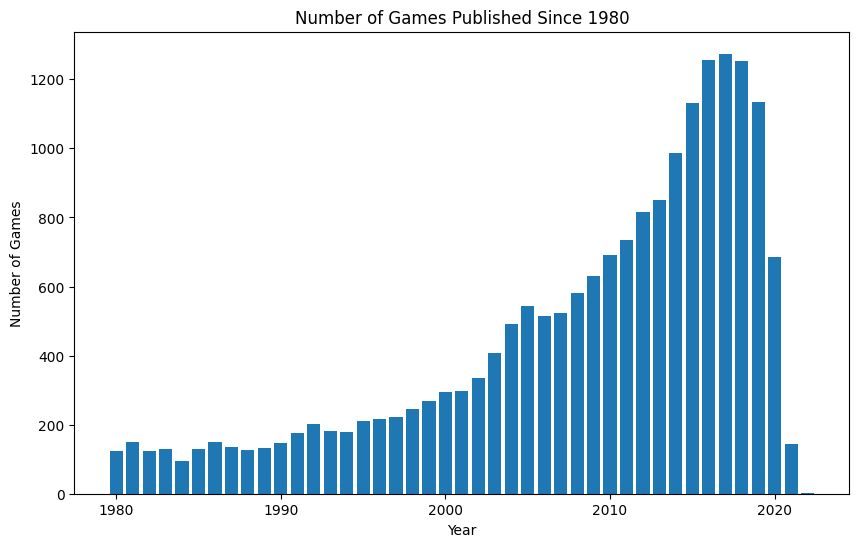


### Outliers in Game Trends ###
Series([], Name: count, dtype: int64)

### Number of Unique Mechanics: 183 ###

### Examples of Mechanics: ['Simulation', 'Re-rolling and Locking', 'Induction', 'Selection Order Bid', 'Hidden Roles'] ###

### Board Game Class Example ###
Gloomhaven (Published: 2017.0) - Min Players: 1, Max Players: 4, Avg Rating: 8.79, Complexity: 3.86
You must use Action Queue, Action Retrieval, Campaign / Battle Card Driven, Card Play Conflict Resolution, Communication Limits, Cooperative Game, Deck Construction, Deck Bag and Pool Building, Grid Movement, Hand Management, Hexagon Grid, Legacy Game, Modular Board, Once-Per-Game Abilities, Scenario / Mission / Campaign Game, Simultaneous Action Selection, Solo / Solitaire Game, Storytelling, Variable Player Powers in this game.

### Strategy Game Class Example ###
Gloomhaven (Published: 2017.0) - Min Players: 1, Max Players: 4, Avg Rating: 8.79, Complexity: 3.86
Embark on a journey in Gloomhaven! Use the following strat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'BGG_Data_Set.csv'
df = pd.read_csv(file_path)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 1a. Exploratory Data Analysis (EDA)
print("\n### Dataset Overview ###")
print(df.head())

# Check for missing values
print("\n### Missing Values ###")
print(df.isnull().sum())

# Handle missing values
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(0)

# Descriptive statistics
print("\n### Descriptive Statistics ###")
print(df.describe())

# 1b. Top 10 Highest-Rated Games After 2000
filtered_games = df[df['year_published'] > 2000]
top_rated = filtered_games.sort_values(by='rating_average', ascending=False).head(10)

print("\n### Top 10 Highest-Rated Board Games (After 2000) ###")
print(top_rated[['name', 'year_published', 'rating_average']])

# Written answer for 1b:
# The top 10 highest-rated board games published after the year 2000 include:
# - DEFCON 1 (2021), Rating: 9.54
# - Star Trek: Alliance - Dominion War Campaign (2021), Rating: 9.46
# - Aeolis (2020), Rating: 9.43
# These games stand out with their exceptional ratings, showing an upward trend in quality game releases in recent years.

# 1c. Visualization: Average Complexity Trend
complexity_trend = df.groupby('year_published')['complexity_average'].mean()

plt.figure(figsize=(10, 6))
plt.plot(complexity_trend.index, complexity_trend.values, marker='o')
plt.title('Average Game Complexity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Complexity')
plt.grid(True)
plt.show()

# 1d. Number of Games Published Since 1980
games_since_1980 = df[df['year_published'] >= 1980]
games_trend = games_since_1980['year_published'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(games_trend.index, games_trend.values)
plt.title('Number of Games Published Since 1980')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

# 1e. Outliers Detection
outliers = games_trend[games_trend > games_trend.mean() + 3 * games_trend.std()]
print("\n### Outliers in Game Trends ###")
print(outliers)

# Written answer for 1e:
# The two outliers in the chart are:
# - Year 2016: 1,257 games published
# - Year 2017: 1,274 games published
# These years experienced a significant spike compared to the surrounding years, indicating a peak in game releases.

# 1f. Unique Mechanics
mechanics_list = df['mechanics'].dropna().str.split(', ')
unique_mechanics = set(mechanic for sublist in mechanics_list for mechanic in sublist)
print(f"\n### Number of Unique Mechanics: {len(unique_mechanics)} ###")

# Examples of unique mechanics
print(f"\n### Examples of Mechanics: {list(unique_mechanics)[:5]} ###")

# 2a. BoardGame Class
class BoardGame:
    def __init__(self, game_id, name, year, min_players, max_players, play_time, min_age, num_ratings, avg_rating, rank, complexity, num_owners, mechanics, domains):
        self.game_id = game_id
        self.name = name
        self.year = year
        self.min_players = min_players
        self.max_players = max_players
        self.play_time = play_time
        self.min_age = min_age
        self.num_ratings = num_ratings
        self.avg_rating = avg_rating
        self.rank = rank
        self.complexity = complexity
        self.num_owners = num_owners
        self.mechanics = mechanics
        self.domains = domains

    def display_info(self):
        print(f"{self.name} (Published: {self.year}) - Min Players: {self.min_players}, Max Players: {self.max_players}, Avg Rating: {self.avg_rating}, Complexity: {self.complexity}")

    def play_game(self):
        print(f"You must use {self.mechanics} in this game.")

# Example instance
example_game = BoardGame(*df.iloc[0].values)
print("\n### Board Game Class Example ###")
example_game.display_info()
example_game.play_game()

# 2b. StrategyGame Child Class
class StrategyGame(BoardGame):
    def play_game(self):
        print(f"Embark on a journey in {self.name}! Use the following strategies: {self.mechanics} to conquer your enemies.")

# Filter for strategy games
strategy_game = df[df['domains'].str.contains('Strategy', na=False)].iloc[0]
strategy_game_instance = StrategyGame(*strategy_game.values)

print("\n### Strategy Game Class Example ###")
strategy_game_instance.display_info()
strategy_game_instance.play_game()
